In [1]:
import sklearn
import pandas as pd
import numpy as np
iris = pd.read_csv("D:\TUGAS\AI\Iris.csv")

In [2]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Split Dataset

In [3]:
iris.drop('Id',axis=1,inplace=True)

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm']

x = iris[feature]
y = iris.Species

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

#### Menghitung data x_test

In [5]:
len(x_test)

45

## Validation Set

In [6]:
from sklearn import tree

#classifier
clf = tree.DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import cross_val_score
 
# mengevaluasi performa model dengan cross_val_score
Hasil = cross_val_score(clf, x, y, cv=5)


Hasil

array([0.96666667, 1.        , 0.9       , 0.96666667, 0.9       ])

In [8]:
### Semakin banyak Cv semakin banyak fold yang digunakan
### Apabila rata-rata Hasil persentase bagus berarti modelnya bagus (dalam hal ini clf)
### Umumnya 0.85 - 0.99

# Supervised Learning

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model.fit(x, y)

DecisionTreeClassifier()

In [10]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
# 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm'
tree_model.predict([[3, 4, 4, 1]])

array(['Iris-setosa'], dtype=object)

In [11]:
print(x.shape)
print(y.shape)
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)
print(X.shape)
print(Y.shape)

(150, 4)
(150,)
(600, 1)
(150, 1)


In [12]:
### Melihat Hasil Tree ( File .dot ) https://onlineconvertfree.com/converter/images/.

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

### Linear Regression

In [19]:
import numpy as np

#membuat data dummy
bed = np.array([1,2,2,3,3,4,4,5,5,6])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

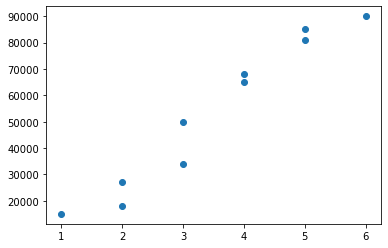

In [20]:
import matplotlib.pyplot as plt

plt.scatter(bed,house_price)

In [21]:
from sklearn.linear_model import LinearRegression

## Bed dijadiin dimensi 2 karena merupakan fitur
bed = bed.reshape(-1,1)
lr = LinearRegression()

lr.fit(bed,house_price)



LinearRegression()

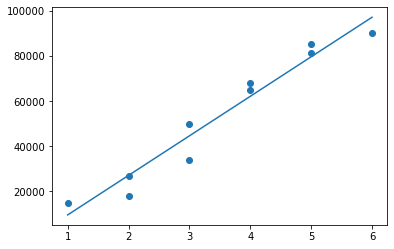

In [22]:
plt.scatter(bed,house_price)
plt.plot(bed,lr.predict(bed))

## Logistic Regression 

In [1]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Social_Network_Ads.csv')

In [2]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
D = data.drop(columns=['User ID'])

D = pd.get_dummies(data)

D.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [9]:
### Memisahkan Label dan Atribut

atribut = ['Age','EstimatedSalary','Gender_Female','Gender_Male']

x = D[atribut]
y = D['Purchased']

In [11]:
### Normalisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [12]:
### Split data

from sklearn.model_selection import train_test_split
 
# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [13]:
### Melatih model menggunakan fitur fit()

from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
### Menguji akurasi Model yang telah dilatih

from sklearn.preprocessing import StandardScaler
 
# uji akurasi model
model.score(X_test, y_test)

0.825

In [29]:
from sklearn.model_selection import cross_val_score
 
# mengevaluasi performa model dengan cross_val_score
Hasil = cross_val_score(model, X_test, y_test, cv=5)


Hasil

array([0.875 , 0.8125, 0.9375, 0.625 , 0.75  ])

In [16]:
## Memprediksi Rumah yang dijual kepada laki-laki umur 20 tahun dengan gaji 50000

pred = scaler.transform ([[20,50000,0,1]])
print(model.predict(pred))

## [0] = Tidak ada , [1] = ada

[0]


In [17]:
pred = scaler.transform ([[49,36000,1,0]])
print(model.predict(pred))

## [0] = Tidak ada , [1] = ada

[1]
